In [3]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the folder path

In [4]:
MAX_SAMPLE = None
train_path = '/content/train.csv'
train = pd.read_csv(train_path)
train = train[:MAX_SAMPLE]
train

,Id,section_title,text,pub_title,cleaned_label,dataset_title,dataset_label
0,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Introduction,"Grasslands provide key services, especially in...",Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...
1,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Study area,The study area consisted of the states Oklahom...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...
2,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Data acquisition and preparation,NaN,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...
3,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Land cover information,Land cover data were sourced from cropscape.or...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...
4,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Bird detection/non-detection data,Bird data were sourced from the North American...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...
...,...,...,...,...,...,...,...
258709,78582aa8-7b60-45bb-8a43-f402aaa61f5b,III. RESULTS,NaN,SATELLITE OBSERVED WATER QUALITY CHANGES IN TH...,coastal change analysis program,Coastal Change Analysis Program,Coastal Change Analysis Program
258710,78582aa8-7b60-45bb-8a43-f402aaa61f5b,Water Clarity/Photic Zone,Submerged Aquatic Vegetation Figure 6 shows th...,SATELLITE OBSERVED WATER QUALITY CHANGES IN TH...,coastal change analysis program,Coastal Change Analysis Program,Coastal Change Analysis Program
258711,78582aa8-7b60-45bb-8a43-f402aaa61f5b,Primary Production,Harmful Algal Blooms Figure 8a shows the time ...,SATELLITE OBSERVED WATER QUALITY CHANGES IN TH...,coastal change analysis program,Coastal Change Analysis Program,Coastal Change Analysis Program
258712,78582aa8-7b60-45bb-8a43-f402aaa61f5b,Color Producing Agents,The primary color producing agents in the Grea...,SATELLITE OBSERVED WATER QUALITY CHANGES IN TH...,coastal change analysis program,Coastal Change Analysis Program,Coastal Change Analysis Program


In [5]:
train['text'][0]

'Grasslands provide key services, especially in terms of food production, and key habitats for a range of biodiversity (Davis et al., 2016;Fuhlendorf et al., 2006;Howland et al., 2016) yet are currently one of the most threatened ecosystems globally (Fargione et al., 2009;Samson and Knopf, 1994;Vickery et al., 1995). Since the late 18th century, major land cover changes, such as grassland conversion to cropland and, elsewhere, woody plant encroachment, have occurred across large portions of the Great Plains in North America. These changes have contributed to habitat reduction for many species and subsequent biodiversity loss (McLeman et al., 2014;Samson et al., 2004;WWF, 2016). Despite widespread and ongoing grassland loss (Clark et al., 2002;Raz-Yaseef et al., 2015;WWF, 2016), the Great Plains region still maintains some of the largest areas of natural grasslands, about 37%, in North America (Han et al., 2012;Homer et al., 2015). Natural processes such as fire, which gives rise to het

In [6]:
train['cleaned_label'].unique().tolist()

['north american breeding bird survey bbs|north american breeding bird survey',
 'agricultural resource management survey',
 'early childhood longitudinal study',
 'rural urban continuum codes',
 'adni',
 'census of agriculture',
 'adni|alzheimer s disease neuroimaging initiative adni',
 'survey of industrial research and development',
 'survey of earned doctorates|survey of doctorate recipients|nsf survey of earned doctorates',
 'our world in data',
 'our world in data covid 19 dataset|our world in data covid 19|our world in data',
 'noaa tide gauge',
 'trends in international mathematics and science study',
 'north american breeding bird survey|north american breeding bird survey bbs',
 'survey of doctorate recipients',
 'coastal change analysis program|noaa c cap',
 'ibtracs',
 'sars cov 2 genome sequences',
 'genome sequence of sars cov 2',
 'baltimore longitudinal study of aging',
 'baltimore longitudinal study of aging blsa|baltimore longitudinal study of aging',
 'survey of indu

In [7]:
train['cleaned_label'] = train['cleaned_label'].apply(lambda x: x.split("|")[0])
train['dataset_title'] = train['dataset_title'].apply(lambda x: x.split("|")[0])
train['dataset_label'] = train['dataset_label'].apply(lambda x: x.split("|")[0])

In [8]:
train['cleaned_label'].unique().tolist()

['north american breeding bird survey bbs',
 'agricultural resource management survey',
 'early childhood longitudinal study',
 'rural urban continuum codes',
 'adni',
 'census of agriculture',
 'survey of industrial research and development',
 'survey of earned doctorates',
 'our world in data',
 'our world in data covid 19 dataset',
 'noaa tide gauge',
 'trends in international mathematics and science study',
 'north american breeding bird survey',
 'survey of doctorate recipients',
 'coastal change analysis program',
 'ibtracs',
 'sars cov 2 genome sequences',
 'genome sequence of sars cov 2',
 'baltimore longitudinal study of aging',
 'baltimore longitudinal study of aging blsa',
 'world ocean database',
 'education longitudinal study',
 'optimum interpolation sea surface temperature',
 'nces common core of data',
 'slosh model',
 'national education longitudinal study',
 'covid 19 open research dataset cord 19',
 'noaa tide station',
 'ffrdc research and development survey',
 'nat

In [8]:
!pip install wordcloud

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

In [10]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.tokenize import sent_tokenize
import string

In [11]:
import re

def clean_json_text(text, stopwords_list):
    # Replace unwanted characters
    text = text.replace('\\', '').replace('\n', '').replace('\uf09f', '')

    # Convert text to lowercase and remove non-word characters
    text = re.sub(r'[^\w\s]', '', text.lower().strip())

    # Split text into tokens
    lst_text = text.split()

    # Remove stopwords
    lst_text = [token for token in lst_text if token not in stopwords_list]

    # Join the tokens back into a single string
    full_text = ' '.join(lst_text)

    return full_text

# Sample stopwords list
stopwords_list = ['the', 'is', 'in', 'and', 'to', 'a']  # Add more stopwords as needed

# Sample text
sample_text = "This is a sample text, containing some stopwords and special characters! \uf09f"

# Clean the text
cleaned_text = clean_json_text(sample_text, stopwords_list)

print(cleaned_text)

this sample text containing some stopwords special characters


In [12]:
MAX_LENGTH = 64
OVERLAP = 20

def shorten_sentences(sentences):
    short_sentence = []
    for sentence in sentences :
        word = sentence.split()
        #short_sentence.append(word)
        if len(word) > MAX_LENGTH :
            for n in range(0, len(word), MAX_LENGTH - OVERLAP):
                short_sentence.append(' '.join(word[n:n+MAX_LENGTH])) # Pour ajouter un nombre de mots compris entre n et n+MAX_LENGTH mots
        else :
            short_sentence.append(sentence)

    return short_sentence

#shorten_sentences(text_from_json[10:15])

#### the word_tokenize function from the NLTK (Natural Language Toolkit) library, used to divide a string into individual words (or tokens).

In [13]:
import re
import nltk
from tqdm import tqdm

# Ensure NLTK's punkt tokenizer is downloaded
nltk.download('punkt')

# Sample stopwords list - update this with your actual list
stopwords_list = ['the', 'is', 'in', 'and', 'to', 'a']  # Add more stopwords as needed

DATA = []
label_count = 0
empty_count = 0

# Iterate over the DataFrame using tqdm for progress tracking
for index, row in tqdm(train.iterrows(), total=train.shape[0]):
    balanced = False

    # Convert text to string and clean it
    text_row = str(row['text'])

    # Tokenize sentences and clean them
    sentences = [clean_json_text(text, stopwords_list) for text in nltk.sent_tokenize(text_row)]

    # Shorten sentences based on your criteria
    sentences = shorten_sentences(sentences)

    # Filter out sentences that are too short
    sentences = [sentence for sentence in sentences if len(sentence) > 8]

    # Iterate through the filtered sentences
    for sentence in sentences:
        dataset_title = row['dataset_title']
        dataset_label = row['dataset_label'].lower()
        cleaned_label = row['cleaned_label']

        # Check for dataset mentions using regex
        a = re.search(re.escape(dataset_title.lower()), sentence)
        b = re.search(re.escape(dataset_label), sentence)
        c = re.search(re.escape(cleaned_label), sentence)

        if a is not None:
            DATA.append((sentence, cleaned_label))
            label_count += 1
            balanced = True
        elif b is not None:
            DATA.append((sentence, dataset_label))
            label_count += 1
            balanced = True
        elif c is not None:
            DATA.append((sentence, dataset_title))
            label_count += 1
            balanced = True

        # If a dataset was found in this iteration, update empty_count accordingly
        if not balanced:
            empty_count += 1

print('Text with dataset:', label_count)
print('Text without dataset:', empty_count)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 258714/258714 [07:13<00:00, 596.76it/s]

Text with dataset: 44382
Text without dataset: 3605621


In [14]:
new_df = pd.read_csv('/content/train_set_matched.csv')

In [15]:
new_df.head(10)

,Id,section_title,text,pub_title,cleaned_label,dataset_title,dataset_label,text_length,contained_cleaned_label,matched_string,label_indexes,cleaned_section_title
0,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Introduction,"Grasslands provide key services, especially in...",Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,4791,north american breeding bird survey bbs|north ...,north american breeding bird survey bbs|north ...,"[(3371, 3410), (3371, 3406)]",introduction
1,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Study area,The study area consisted of the states Oklahom...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,994,NaN,NaN,[],study area
2,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Data acquisition and preparation,NaN,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,0,NaN,NaN,[],data acquisition and preparation
3,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Land cover information,Land cover data were sourced from cropscape.or...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,3173,NaN,NaN,[],land cover information
4,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Bird detection/non-detection data,Bird data were sourced from the North American...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,1878,NaN,NaN,[],bird detection non detection data
5,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Data analyses,NaN,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,0,NaN,NaN,[],data analyses
6,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Quantification of land cover change across ent...,"To identify land cover change, we calculated t...",Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,1491,NaN,NaN,[],quantification of land cover change across ent...
7,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Changes in avian population dynamics in respon...,An occupancy model was developed for each spec...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,5178,NaN,NaN,[],changes in avian population dynamics in respon...
8,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Results,NaN,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,0,NaN,NaN,[],results
9,796f35c1-ba6b-4552-8a7f-5d8b61164fb0,Quantification of land cover change across ent...,The number of land cover transitions observed ...,Land cover dynamics influence distribution of ...,north american breeding bird survey bbs|north ...,North American Breeding Bird Survey (BBS)|Nort...,North American Breeding Bird Survey (BBS)|Nort...,1081,NaN,NaN,[],quantification of land cover change across ent...


In [16]:
new_df.shape

(258714, 12)

# Data Vizualization
### We can quickly get an overview of the distribution of words used in our train_csv , in order to identify the words with the most occurrences in the data

### Let's have a look on the data on the result DataFrame From DATA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

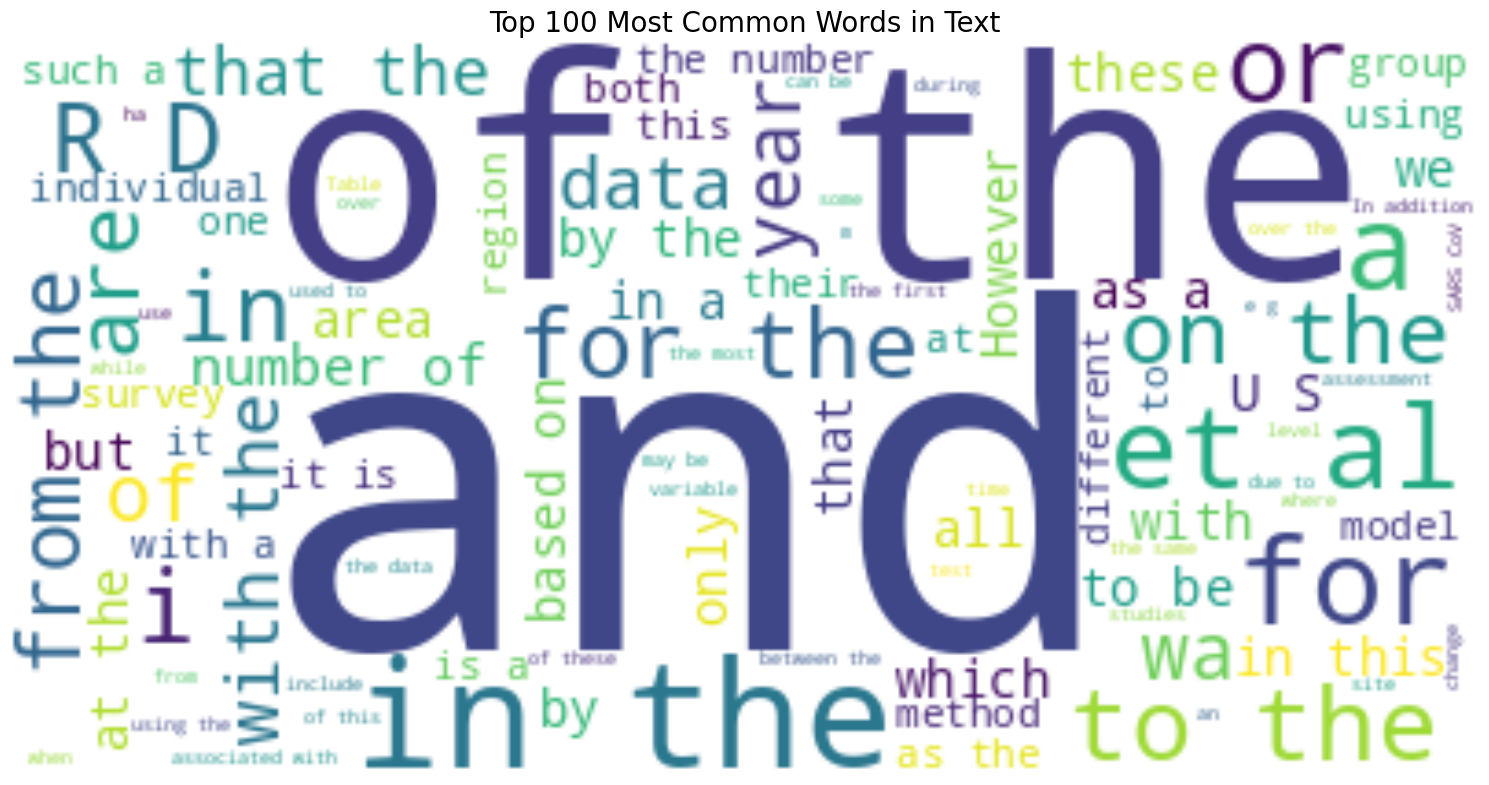

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use only a subset of the data (for example, the first 1000 rows)
df_subset = new_df['text'].astype(str).head(1000)  # Use first 1000 rows or adjust accordingly

# Join the text into one string
mostcommon_sent = ' '.join(df_subset.values)

# Define stopwords list (if needed, you can use a predefined stopwords list)
stopwords_list = set()  # Or use STOPWORDS from wordcloud if predefined

# Generate the word cloud with a limit on the number of words
wordcloud = WordCloud(background_color='white', stopwords=stopwords_list, max_words=100).generate(mostcommon_sent)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 100 Most Common Words in Text', fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# stemming

# Lemmatisation

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords_list, max_words=100).generate(mostcommon_sent)
lem = nltk.stem.WordNetLemmatizer()
lemmatized_words = [lem.lemmatize(word) for word in mostcommon_sent]

mostcommon_lem = Counter(lemmatized_words).most_common(50)
mostcommon_lem

[(' ', 372128),
 ('e', 234176),
 ('t', 165724),
 ('a', 151911),
 ('i', 145955),
 ('n', 134773),
 ('o', 131083),
 ('s', 127269),
 ('r', 120777),
 ('l', 75793),
 ('d', 71640),
 ('c', 68368),
 ('h', 67940),
 ('u', 49404),
 ('m', 47640),
 ('f', 42379),
 ('p', 42259),
 ('g', 35777),
 ('y', 26410),
 ('b', 22794),
 ('w', 22252),
 ('v', 22173),
 (',', 21512),
 ('.', 20991),
 ('0', 11348),
 ('1', 9869),
 ('2', 8576),
 ('-', 7854),
 (')', 7637),
 ('(', 7622),
 ('S', 7389),
 ('T', 7174),
 ('A', 6572),
 ('k', 6162),
 ('9', 5159),
 ('x', 4960),
 ('I', 4719),
 ('C', 4545),
 ('D', 4193),
 ('3', 3811),
 ('R', 3771),
 ('M', 3459),
 ('F', 3366),
 ('5', 3157),
 ('P', 3122),
 ('4', 2837),
 ('N', 2675),
 ('q', 2485),
 ('8', 2443),
 ('E', 2355)]

# N-grams

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Import necessary libraries
import nltk
from nltk import ngrams
from collections import Counter

# Tokenize the sentence into words (you can use nltk's word tokenizer or basic split)
words = nltk.word_tokenize(mostcommon_sent)  # Alternatively: mostcommon_sent.split()

# Create bigrams (ngrams of size 2)
bigrams = list(ngrams(words, 2))

# Count the frequency of each bigram
ngram_freq = Counter(bigrams)

# Display the most common bigrams
print(ngram_freq.most_common(20))

# Display the total number of bigrams found
total_bigrams = len(bigrams)
print(f"\nTotal number of 2-grams found in the sentence: {total_bigrams}")

[(('of', 'the'), 2501), ((')', '.'), 2479), (('in', 'the'), 2183), ((',', 'and'), 2152), (('.', 'The'), 2125), ((',', 'the'), 1483), ((')', ','), 1293), (('.', 'In'), 1003), (('to', 'the'), 998), (('R', '&'), 841), (('&', 'D'), 837), (('al.', ','), 800), (('and', 'the'), 797), (('et', 'al.'), 796), (('for', 'the'), 776), ((',', 'we'), 765), (('on', 'the'), 710), (('from', 'the'), 645), (('.', 'We'), 585), (('.', 'This'), 583)]

Total number of 2-grams found in the sentence: 432516


In [22]:
trigrams = list(ngrams(words, 3))
# Counting the frequency of each ngram
ngram_freq = Counter(trigrams)

# Display the most common ngrams
print(ngram_freq.most_common(20))

# Display the total number of 5-grams found
total_trigrams = len(trigrams)
print(f"\nTotal number of 3-grams found in 'Sentence': {total_trigrams}")

[(('R', '&', 'D'), 831), (('et', 'al.', ','), 796), (('et', 'al', '.'), 516), ((')', '.', 'The'), 352), (('.', 'However', ','), 292), ((',', 'and', 'the'), 223), (('the', 'number', 'of'), 219), ((')', ',', 'and'), 217), (('.', 'In', 'the'), 213), ((')', '.', 'In'), 193), (('as', 'well', 'as'), 155), (('al', '.', '('), 148), (('.', 'In', 'addition'), 148), (('the', 'United', 'States'), 134), ((')', '.', 'We'), 124), (('&', 'D', 'expenditures'), 124), (('In', 'addition', ','), 122), (('included', 'in', 'the'), 119), (('.', 'Thus', ','), 118), (('.', 'In', 'this'), 117)]

Total number of 3-grams found in 'Sentence': 432515


In [23]:
pentagrams = list(ngrams(words, 5))
# Counting the frequency of each ngram
ngram_freq = Counter(pentagrams)

# Display the most common ngrams
print(ngram_freq.most_common(20))

# Display the total number of 5-grams found
total_pentagrams = len(pentagrams)
print(f"\nTotal number of 5-grams found in 'Sentence': {total_pentagrams}")

[(('the', 'large', 'company', 'partition', '.'), 52), (('in', 'the', 'large', 'company', 'partition'), 51), (('R', '&', 'D', 'performing', 'firms'), 49), (('were', 'included', 'in', 'the', 'large'), 47), (('included', 'in', 'the', 'large', 'company'), 47), (('or', 'more', 'were', 'included', 'in'), 46), (('more', 'were', 'included', 'in', 'the'), 46), (('sector', ',', 'companies', 'with', 'employment'), 46), ((',', 'companies', 'with', 'employment', 'of'), 46), (('from', 'the', 'small', 'company', 'partition'), 43), (('total', 'R', '&', 'D', 'expenditures'), 39), (('This', 'article', 'is', 'protected', 'by'), 31), (('article', 'is', 'protected', 'by', 'copyright'), 31), (('is', 'protected', 'by', 'copyright', '.'), 31), (('protected', 'by', 'copyright', '.', 'All'), 31), (('by', 'copyright', '.', 'All', 'rights'), 31), (('copyright', '.', 'All', 'rights', 'reserved'), 31), (('On', 'the', 'other', 'hand', ','), 29), (('of', 'total', 'R', '&', 'D'), 29), (('et', 'al.', ',', '2020', ')'),

In [24]:
# Example 3-word labels (replace with your actual dataset labels)
unique_three_word_labels = {"example of label", "another unique label"}

# Create a set of 3-gram strings for comparison
all_ngram_strings = {' '.join(ngram) for ngram in trigrams}  # Use 'trigrams' or whatever n-gram you're working with

# Find matches between 3-word labels and generated n-grams
matches = unique_three_word_labels.intersection(all_ngram_strings)
match_count = len(matches)

# Print the number of matches
print(f"Number of matches between unique dataset labels and 3-grams: {match_count}")

Number of matches between unique dataset labels and 3-grams: 0
